In [1]:
import numpy as np
import pandas as pd


In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/mall.csv')

In [4]:
df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Spending Score')

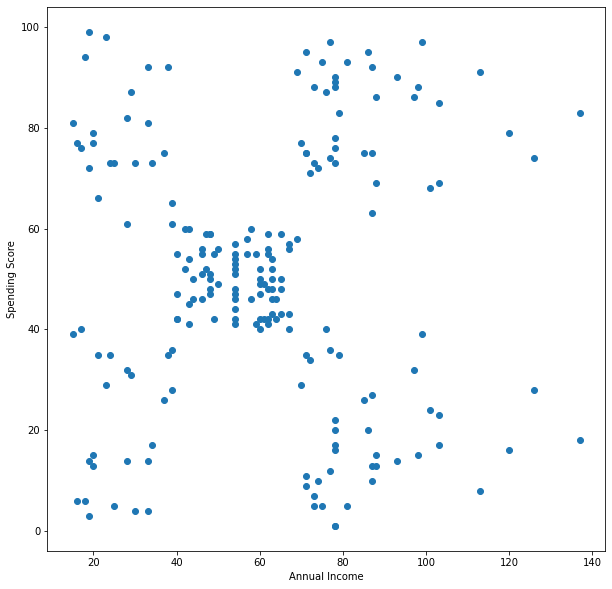

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

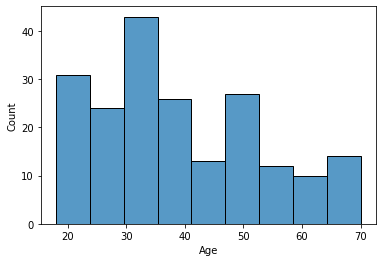

In [11]:
import seaborn as sns
sns.histplot(df['Age'])
plt.show()

In [12]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=41)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=41)

In [16]:
y = kmeans.predict(X)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

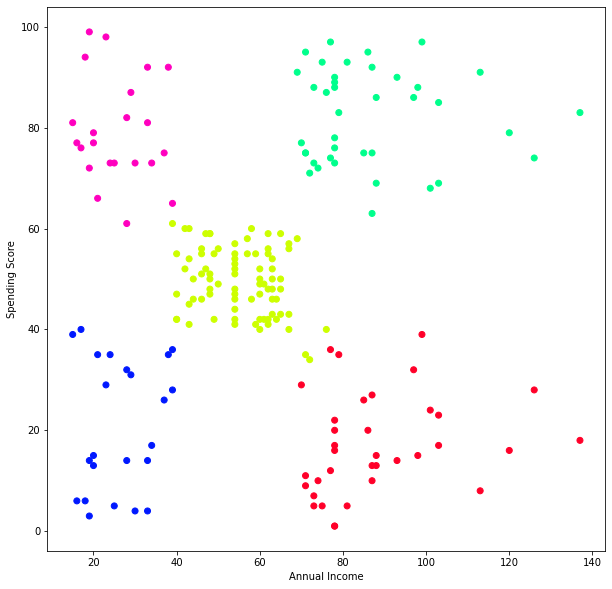

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=y, cmap='gist_rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


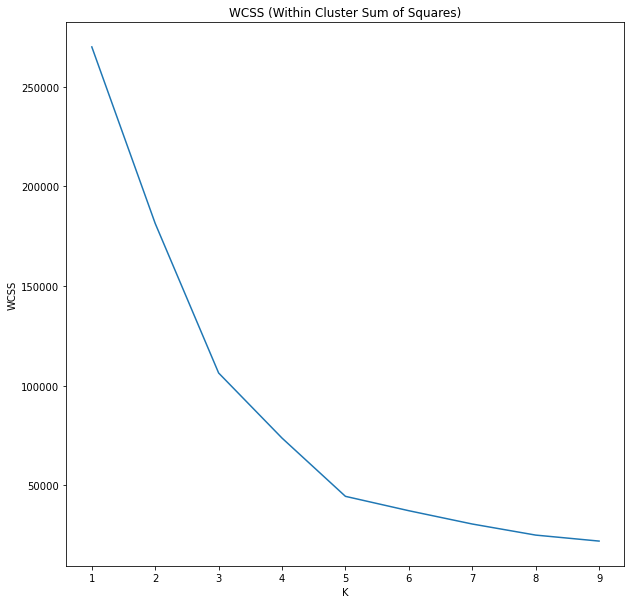

In [21]:
plt.figure(figsize=(10,10))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(range(1,10),wcss)
plt.xticks(range(1,10))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()